In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Video 12

Corner detection


In [4]:
img = cv2.imread('opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [5]:
#detecting corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
print(corners.shape)
print(gray.shape)


(100, 1, 2)
(457, 653)


In [6]:
for corner in corners:
    print(corner.ravel())
    x, y = corner.ravel()
    cv2.circle(img, (x,y), 4, (255, 0, 255), -1)


[112 153]
[ 77 191]
[568 223]
[516 233]
[127 298]
[ 78 180]
[112 142]
[534 258]
[188 254]
[533 223]
[507 242]
[528 245]
[584 253]
[584 242]
[115 299]
[106 312]
[573 211]
[460 225]
[573 242]
[573 253]
[460 237]
[119 282]
[458 252]
[447 211]
[117 262]
[447 253]
[458 212]
[475 212]
[486 212]
[473 238]
[473 225]
[475 252]
[486 252]
[584 212]
[544 223]
[56 63]
[176 395]
[233 328]
[ 93 392]
[ 49 350]
[251 204]
[164  60]
[ 17 254]
[ 53 134]
[551 241]
[558 223]
[277 207]
[277 403]
[400 403]
[400 207]
[375 145]
[375  30]
[509 145]
[509  30]
[115 272]
[140 184]
[152  98]
[150 109]
[518 244]
[104 236]
[146 152]
[126 221]
[155 357]
[102 333]
[169 387]
[100 366]
[102 356]
[148 142]
[158  73]
[ 96 219]
[ 92 379]
[155  87]
[124 231]
[ 99 346]
[153 341]
[111 251]
[ 67 157]
[151 129]
[168 373]
[130 203]
[140 313]
[121 245]
[ 69 173]
[ 61 144]
[146 326]
[109 324]
[ 90 206]
[142 170]
[132 193]
[507 222]
[520 223]
[228 224]
[ 61 344]
[161 272]
[503 253]
[ 37 228]
[101 156]
[ 28 238]
[ 92 166]
[203 288]


In [7]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

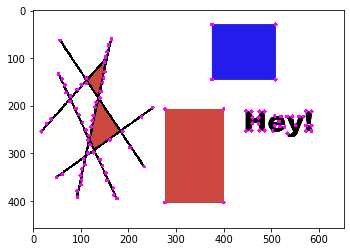

In [8]:
plt.imshow(img)

Video 13

Feature Extraction

In [9]:
img1 = cv2.imread('opencv-feature-matching-template.jpg')
img2 = cv2.imread('opencv-feature-matching-image.jpg')
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
orb = cv2.ORB_create()   #orb finds keypoints

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


In [ ]:
print(type(kp1))
print(des1.shape)
#print(kp2)
print(des2)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  #Brute forces matching keypoints in both images

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

In [12]:
print(type(matches))
matches

<class 'list'>


[<DMatch 0x7fb243841c70>,
 <DMatch 0x7fb2437c3090>,
 <DMatch 0x7fb243841d90>,
 <DMatch 0x7fb2438419d0>,
 <DMatch 0x7fb243841e30>,
 <DMatch 0x7fb2437c31b0>,
 <DMatch 0x7fb243841b30>,
 <DMatch 0x7fb243841b70>,
 <DMatch 0x7fb2437c3590>,
 <DMatch 0x7fb2437c3350>,
 <DMatch 0x7fb243841a50>,
 <DMatch 0x7fb243841db0>,
 <DMatch 0x7fb243841eb0>,
 <DMatch 0x7fb2437c3550>,
 <DMatch 0x7fb243841cd0>,
 <DMatch 0x7fb243841bf0>,
 <DMatch 0x7fb2437c3130>,
 <DMatch 0x7fb2437c3790>,
 <DMatch 0x7fb243841870>,
 <DMatch 0x7fb243841a10>,
 <DMatch 0x7fb243841b50>,
 <DMatch 0x7fb2437c3370>,
 <DMatch 0x7fb2438417d0>,
 <DMatch 0x7fb243841ef0>,
 <DMatch 0x7fb2437c3630>,
 <DMatch 0x7fb2437c32d0>,
 <DMatch 0x7fb243841650>,
 <DMatch 0x7fb2438419f0>,
 <DMatch 0x7fb2437c33d0>,
 <DMatch 0x7fb2437c3570>,
 <DMatch 0x7fb2437c3730>,
 <DMatch 0x7fb243841550>,
 <DMatch 0x7fb243841bb0>,
 <DMatch 0x7fb243841e10>,
 <DMatch 0x7fb2437c3050>,
 <DMatch 0x7fb2437c31f0>,
 <DMatch 0x7fb2437c34d0>,
 <DMatch 0x7fb243841a70>,
 <DMatch 0x7

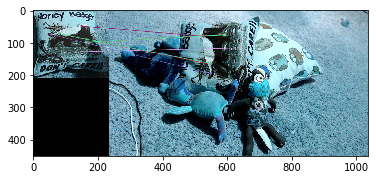

In [13]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.imshow(img3)

In [14]:
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

Video 14

Cutting a moving object

In [15]:
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    _, frame = cap.read()
    fgmask = fgbg.apply(frame)
    
    cv2.imshow('original', frame)
    cv2.imshow('fgmask', fgmask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Video 15

Using haar kaskading

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [3]:
cap = cv2.VideoCapture(0)

while True:
    
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 255), 1)
        roi_gray = gray[y:y+h, x:x+w]
        roi = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi, (ex,ey), (ex+ew, ey+eh), (255, 0, 0), 1)
        
        #smiles = smile_cascade.detectMultiScale(roi_gray, 1.3, 5)
        #for (sx, sy, sw, sh) in smiles:
            #cv2.rectangle(roi, (sx,sy), (sx+sw, sy+sh), (0, 0, 255), 1)
    
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    